<a href="https://colab.research.google.com/github/ovimasbul83/ovimasbul83/blob/main/MyFirstTransferLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

In [ ]:
!wget https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-06-28 15:58:09--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  78.1MB/s    in 1.1s    

2020-06-28 15:58:10 (78.1 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

In [ ]:
local_weight_files='/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model=InceptionV3(include_top=False,input_shape=(150,150,3),weights=None)
pre_trained_model.load_weights(local_weight_files)
for layer in pre_trained_model.layers:
  layer.trainable=False
last_layer=pre_trained_model.get_layer('mixed7')
last_output=last_layer.output
last_output


<tf.Tensor 'mixed7/Identity:0' shape=(None, 7, 7, 768) dtype=float32>

***DNN***

In [ ]:
from tensorflow.keras.optimizers import RMSprop
x=layers.Flatten()(last_output)
x=layers.Dense(1024,activation='relu')(x)
x=layers.Dropout(0.2)(x)
x=layers.Dense(1,activation='sigmoid')(x)
model=Model(pre_trained_model.input,x)
model.compile(optimizer=RMSprop(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
!wget --no-check-certificate \
        https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
       -O /tmp/cats_and_dogs_filtered.zip

from tensorflow.keras.preprocessing.image import ImageDataGenerator

import os
import zipfile

local_zip = '//tmp/cats_and_dogs_filtered.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/tmp')
zip_ref.close()
base_dir = '/tmp/cats_and_dogs_filtered'

train_dir = os.path.join( base_dir, 'train')
validation_dir = os.path.join( base_dir, 'validation')


train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats') 
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator( rescale = 1.0/255. )
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     
validation_generator =  test_datagen.flow_from_directory( validation_dir,
                                                          batch_size  = 20,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

--2020-06-28 15:58:51--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.119.128, 108.177.126.128, 173.194.69.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.119.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   103MB/s    in 0.6s    

2020-06-28 15:58:52 (103 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 20,
            validation_steps = 50,
            verbose = 2)

Epoch 1/20
100/100 - 20s - loss: 1.4523 - accuracy: 0.8460 - val_loss: 0.2628 - val_accuracy: 0.9420
Epoch 2/20
100/100 - 19s - loss: 0.3871 - accuracy: 0.8905 - val_loss: 0.1478 - val_accuracy: 0.9570
Epoch 3/20
100/100 - 18s - loss: 0.3532 - accuracy: 0.9075 - val_loss: 0.1419 - val_accuracy: 0.9570
Epoch 4/20
100/100 - 18s - loss: 0.2942 - accuracy: 0.9235 - val_loss: 0.2555 - val_accuracy: 0.9390
Epoch 5/20
100/100 - 18s - loss: 0.2611 - accuracy: 0.9235 - val_loss: 0.1518 - val_accuracy: 0.9590
Epoch 6/20
100/100 - 18s - loss: 0.2999 - accuracy: 0.9170 - val_loss: 0.3113 - val_accuracy: 0.9190
Epoch 7/20
100/100 - 18s - loss: 0.2529 - accuracy: 0.9205 - val_loss: 0.1136 - val_accuracy: 0.9640
Epoch 8/20
100/100 - 18s - loss: 0.2714 - accuracy: 0.9160 - val_loss: 0.1127 - val_accuracy: 0.9600
Epoch 9/20
100/100 - 18s - loss: 0.2509 - accuracy: 0.9170 - val_loss: 0.1820 - val_accuracy: 0.9500
Epoch 10/20
100/100 - 18s - loss: 0.2215 - accuracy: 0.9330 - val_loss: 0.1274 - val_accura

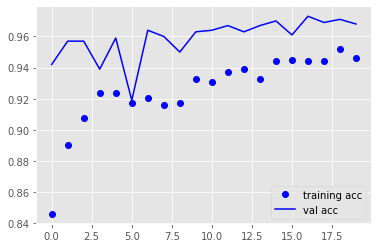

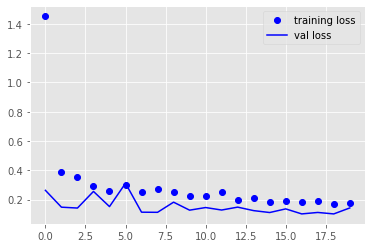

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style
matplotlib.style.use('ggplot')
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epoch=range(len(acc))
plt.plot(epoch,acc,'bo',label='training acc')
plt.plot(epoch,val_acc,'b',label='val acc')
plt.legend()
plt.figure()
plt.plot(epoch,loss,'bo',label='training loss')
plt.plot(epoch,val_loss,'b',label='val loss')
plt.legend()
plt.show()